In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('rossmann-data.csv')
print(df.head(50))

    Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0       1          5  2015-07-31   5263        555     1      1             0   
1       2          5  2015-07-31   6064        625     1      1             0   
2       3          5  2015-07-31   8314        821     1      1             0   
3       4          5  2015-07-31  13995       1498     1      1             0   
4       5          5  2015-07-31   4822        559     1      1             0   
5       6          5  2015-07-31   5651        589     1      1             0   
6       7          5  2015-07-31  15344       1414     1      1             0   
7       8          5  2015-07-31   8492        833     1      1             0   
8       9          5  2015-07-31   8565        687     1      1             0   
9      10          5  2015-07-31   7185        681     1      1             0   
10     11          5  2015-07-31  10457       1236     1      1             0   
11     12          5  2015-0

#Group by Promo, find average sales

In [7]:
promo_sales = df.groupby('Promo')['Sales'].mean().reset_index()

#Visualization Avg Sales with/without Promo

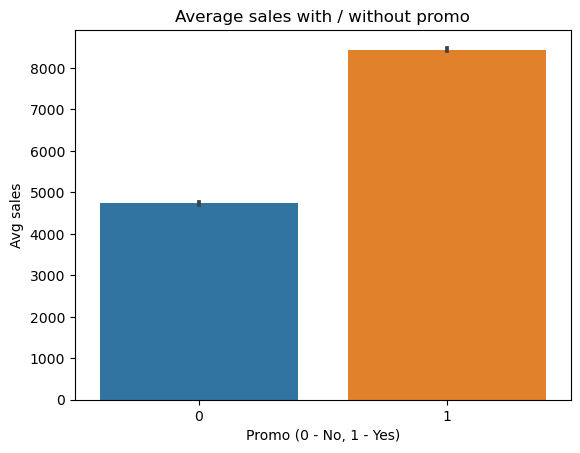

In [75]:
sns.barplot(x='Promo', y = 'Sales', data = df)
plt.title('Average sales with / without promo')
plt.xlabel('Promo (0 - No, 1 - Yes)')
plt.ylabel('Avg sales')
plt.savefig('average_sales_promo.png')
plt.show()

#Sales Promo by day of week

In [78]:
df['DayOfWeekNum'] = df['Date'].dt.dayofweek
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Son'}
df['DayOfWeek'] = df['DayOfWeekNum'].map(day_names)
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Son'], ordered=True)

promo_names = {0: 'No', 1: 'Yes'}
df['Promo'] = df['Promo'].map(promo_names)

sales_by_day_promo = df.groupby(['DayOfWeek', 'Promo'], observed=True)['Sales'].mean().reset_index()


#Visualization Sales Promo by day of week

C:\Users\olesy\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\olesy\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


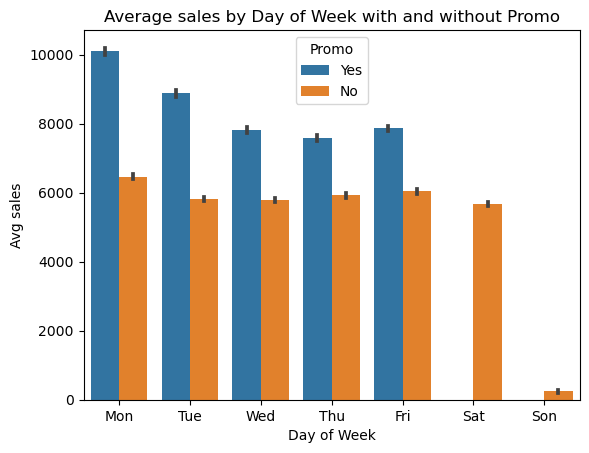

In [79]:
sns.barplot (x='DayOfWeek', y='Sales', hue='Promo', data=df)
plt.title('Average sales by Day of Week with and without Promo')
plt.xlabel('Day of Week')
plt.ylabel('Avg sales')
plt.savefig('average_sales_by_dow.png')
plt.show()

#Visualization by Store Type

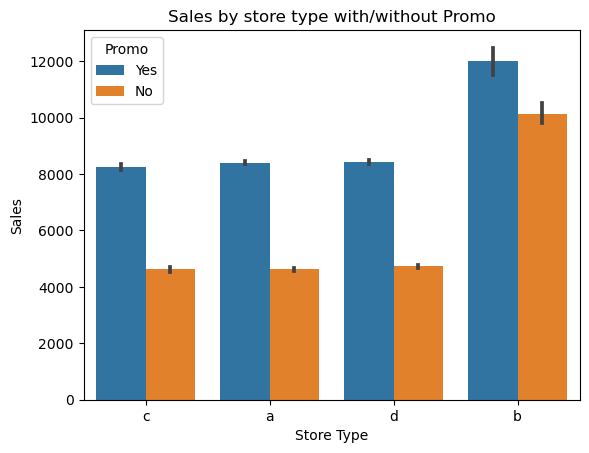

In [80]:
sns.barplot(x='store_type', y='Sales', hue='Promo', data=df)
plt.title('Sales by store type with/without Promo')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.savefig('average_sales_by_storetype.png')
plt.show()

#Table from previous Day of Week Analysis

In [62]:
df1 = pd.read_csv('rossmann-DoW.csv')
print(df1.head())

   DayOfWeek  sales_no_promo  sales_with_promo  customers_no_promo  \
0          1         6464.73          10108.94              729.74   
1          2         5814.15           8883.54              672.54   
2          3         5791.78           7825.87              665.55   
3          4         5922.37           7592.72              682.79   
4          5         6038.45           7870.59              690.93   

   customers_with_promo  avg_check_no_promo  avg_check_with_promo  \
0                916.70                8.86                 11.03   
1                843.00                8.65                 10.54   
2                779.53                8.70                 10.04   
3                770.55                8.67                  9.85   
4                796.70                8.74                  9.88   

   sales_percent_diff  
0               56.37  
1               52.79  
2               35.12  
3               28.20  
4               30.34  


#Visualization Avg check with/without Promo by Day of Week

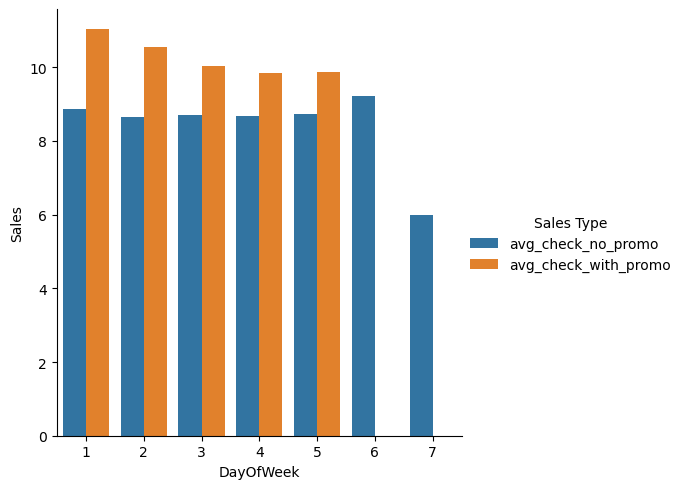

In [81]:
df1_melted = df1.melt(id_vars=['DayOfWeek'], 
                    value_vars=['avg_check_no_promo', 'avg_check_with_promo'], 
                    var_name='Sales Type', 
                    value_name='Sales')
sns.catplot(x='DayOfWeek', 
            y='Sales', 
            hue='Sales Type',  
            kind='bar',        
            data=df1_melted)
plt.savefig('average_check_by_dow.png')

#Visualization % higher sales with Promo then without Promo

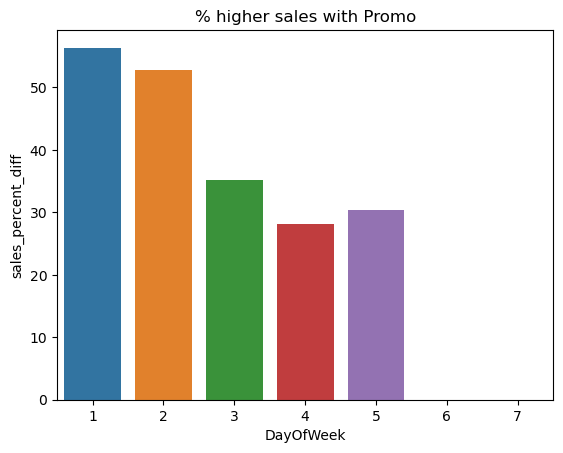

In [82]:
sns.barplot(x='DayOfWeek', y='sales_percent_diff', data=df1)
plt.title('% higher sales with Promo')
plt.savefig('%_sales_promo.png')
plt.show()

#Visualization % higher sales with Promo by Store Type

In [63]:
df2 = pd.read_csv('rossmann-store-type.csv')
print(df2.head())

  StoreType  sales_no_promo  sales_with_promo  store_count  sales_percent_diff
0         a         5803.80           8418.87        602.0               45.06
1         b        10133.33          11994.12         17.0               18.36
2         c         5836.97           8262.17        148.0               41.55
3         d         5946.73           8431.15        348.0               41.78


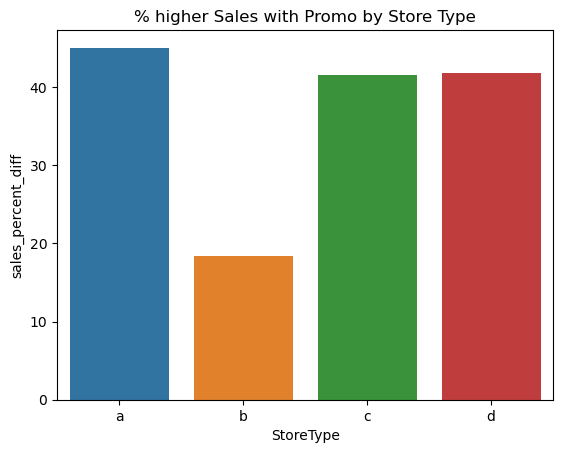

In [83]:
sns.barplot(x='StoreType', y='sales_percent_diff', data=df2)
plt.title('% higher Sales with Promo by Store Type')
plt.savefig('%sales_storetype.png')
plt.show()